# Sign Language Detection Using Action Recognition

Using Nicholas Renotte's [Sign Language Detection using ACTION RECOGNITION with Python | LSTM Deep Learning Model](https://youtu.be/doDUihpj6ro) tutorial

[NR's code on GitHub](https://github.com/nicknochnack/ActionDetectionforSignLanguage)

## Goal: Real-time sign language detection using sequences

1. Estract holistic keypoints
2. Train an LSTM DL model
3. Make real-time predictions using sesquences

We will use:
* __media-pipe holistic__ to extract __keypoints__ from hand, body, face
* __TensorFlow__ and __Keras__ to build up a __long short-term memory deep learning model__ (__LSTM DL__) for predictions

## How it works

1. collect keypoints from mediapipe holistic
2. train a deep neural network with LSTM layers for sequences
3. perform real-time sign language detection using OpenCV

## 1. Install and import dependencies

In [3]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib
# not installing tensorflow-gpu since I'm not using GPU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 10.9 MB/s eta 0:00:0000:0100:01
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-macosx_10_15_x86_64.whl (56.1 MB)


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d669d8ccd377c43a7bab5896baa0070a7f3f9abbe4e9782f521170fe7f72294c
  Stored in directory: /Users/ahalte200/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## 2. Find and view keypoints using MediaPipe (MP) holistic

We will be using the mediapipe package to create the following variables:

* __mp_holistic__ will be used to make our detections
* __mp_drawing__ will be used to draw our detections

In [7]:
mp_holistic = mp.solutions.holistic # holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utilities

In [15]:
# mediapipe_detection(image, model) will find the mediapipe landmarks for an image
# image: the image from the feed we will be scrutinizing
# model: the MP detection model
def mediapipe_detection(image, model):
    # convert color from BGR (cv) to RGB (for mp detection)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # make image unwriteable to save memory
    image.flags.writeable = False
    # make prediction using the MP detection model
    results = model.process(image)
    # make image writeable again
    image.flags.writeable = True
    # convert image back to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [12]:
# FYI: for information on the cv2.cvtColor() function
cv2.cvtColor??

In [103]:
# draw_landmarks(image, results) will draw the landmark points over the live image
# image: the image from the feed we will be drawing on top of
# results: the landmark list we found with mediapipe_detection()
def draw_landmarks(image, results):
    # draw face landmarks & connections
    # no longer use FACE_CONNECTIONS.  Rather, use FACEMESH_TESSELATION
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    # draw pose landmarks & connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    # draw left hand landmarks & connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # draw right hand landmarks & connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    

In [57]:
# FYI: media pipe's documentation on mp_drawing.draw_landmarks
# (mp.solutions.drawing_utils.draw_landmarks)
mp_drawing.draw_landmarks??

In [73]:
# shows what landmark is connected to what landmark
# nose = 0, 1 = inner left eye, 4 = inner right eye, 2 = left eye, 3 = outer left eye
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [107]:
cap = cv2.VideoCapture(2) # 2 is for logitech (near right USB-C port)
# set the mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        #read feed
        ret, frame = cap.read()
        #make detection
        image, results = mediapipe_detection(frame, holistic)
        #draw landmarks and connections
        draw_landmarks(image, results)
        # show to screen
        cv2.imshow('OpenCV Feed', image)
        #break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    # end the video capture setting
    cap.release()
    cv2.waitKey(1)
    # close the video capture window(s)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [84]:
#this will show the number of landmark points of the left hand in the ending frame.
len(results.face_landmarks.landmark)

468

In [104]:
draw_landmarks(frame, results)

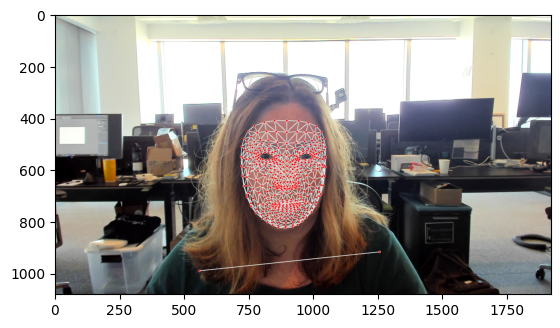

In [106]:
# plot the last frame from the frame array
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [92]:
results.face_landmarks

landmark {
  x: 0.46692702174186707
  y: 0.6650365591049194
  z: -0.01963108405470848
}
landmark {
  x: 0.4675918519496918
  y: 0.6160422563552856
  z: -0.039171554148197174
}
landmark {
  x: 0.4666060209274292
  y: 0.6293234825134277
  z: -0.019717780873179436
}
landmark {
  x: 0.46054041385650635
  y: 0.5632234811782837
  z: -0.03105088137090206
}
landmark {
  x: 0.46775564551353455
  y: 0.6005852818489075
  z: -0.04207610338926315
}
landmark {
  x: 0.4674593508243561
  y: 0.5792293548583984
  z: -0.039609357714653015
}
landmark {
  x: 0.4663774073123932
  y: 0.5254117846488953
  z: -0.020921148359775543
}
landmark {
  x: 0.40989574790000916
  y: 0.513409435749054
  z: 0.004117983393371105
}
landmark {
  x: 0.4662749469280243
  y: 0.4833332300186157
  z: -0.016822626814246178
}
landmark {
  x: 0.4665071666240692
  y: 0.46163707971572876
  z: -0.01906939223408699
}
landmark {
  x: 0.4664400517940521
  y: 0.3808143138885498
  z: -0.013202883303165436
}
landmark {
  x: 0.466865032911300

In [143]:
frame[:2]

array([[[210, 227, 213],
        [211, 227, 213],
        [213, 228, 214],
        ...,
        [219, 247, 243],
        [219, 247, 243],
        [218, 246, 242]],

       [[209, 224, 210],
        [209, 224, 210],
        [211, 225, 211],
        ...,
        [218, 246, 242],
        [219, 247, 243],
        [219, 247, 243]]], dtype=uint8)

In [120]:
# data points for image detection vs landmark detection
print('one frame... ', 'image:', len(frame) * len(frame[0]) * 16 * 2, 'landmark:', 468 * 3 * 16 * 2)
print('two seconds @ 15fps... ', 'image:', len(frame) * len(frame[0]) * 16 * 2, 'landmark:', 468 * 3 * 16 * 2)

one frame...  image: 66355200 landmark: 44928
two seconds @ 15fps...  image: 66355200 landmark: 44928


## 3. Extract keypoint values

### input data

The input data used for this action detection model is a series of __30 arrays__.  __Each__ array contains __1662 values__ (30, 1662).

__Each__ array represents a __single frame__'s the landmark values (1662 values).

We will be using __30 frames of action__ to train and test on.

Typical landmarks will look like this:
<div>
    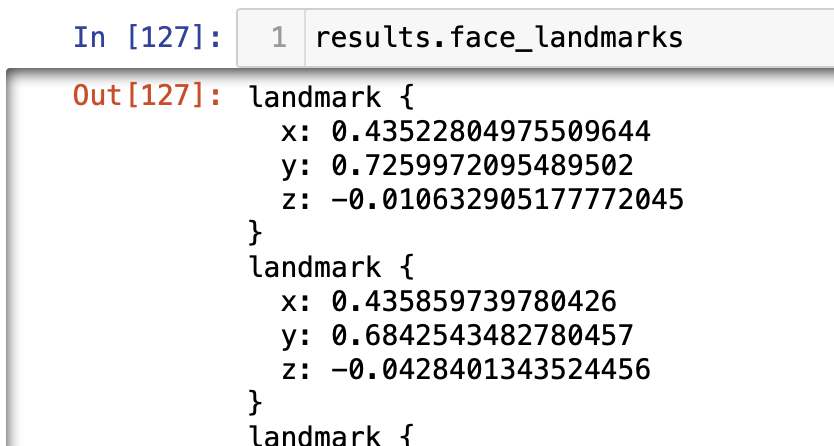
</div>
* We will concatenate the landmarks into a numpy array.
* If there are no landmarks then we will return a numpy 0 array.

In [146]:
pose = []
for res in results.pose_landmarks.landmark:
    landmark_data = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(landmark_data)

In [153]:
# rewrite above code onto one line:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark])


In [154]:
len(pose) # should be 33 since there are 33 mp pose landmarks

33

In [156]:
pose[:5]

array([[ 0.43872616,  0.65727723, -1.25503361,  0.99995404],
       [ 0.45616356,  0.56398141, -1.21145988,  0.99988669],
       [ 0.47180334,  0.55499971, -1.21142995,  0.99989498],
       [ 0.48482412,  0.54663599, -1.21156883,  0.99986643],
       [ 0.39994636,  0.5850715 , -1.21880651,  0.99989033]])

In [157]:
pose.shape

(33, 4)

In [158]:
pose.flatten()

array([ 4.38726157e-01,  6.57277226e-01, -1.25503361e+00,  9.99954045e-01,
        4.56163555e-01,  5.63981414e-01, -1.21145988e+00,  9.99886692e-01,
        4.71803337e-01,  5.54999709e-01, -1.21142995e+00,  9.99894977e-01,
        4.84824121e-01,  5.46635985e-01, -1.21156883e+00,  9.99866426e-01,
        3.99946362e-01,  5.85071504e-01, -1.21880651e+00,  9.99890327e-01,
        3.78275126e-01,  5.90214312e-01, -1.21792209e+00,  9.99901295e-01,
        3.62015456e-01,  5.94271958e-01, -1.21814215e+00,  9.99887168e-01,
        5.06998897e-01,  5.45072019e-01, -7.79214025e-01,  9.99880910e-01,
        3.31990868e-01,  6.06087565e-01, -7.97561765e-01,  9.99925792e-01,
        4.76618916e-01,  7.33214676e-01, -1.08038259e+00,  9.99953330e-01,
        4.10483658e-01,  7.69945800e-01, -1.08402860e+00,  9.99951661e-01,
        6.47955716e-01,  8.46399188e-01, -4.17176217e-01,  9.99410510e-01,
        2.32291281e-01,  9.46410656e-01, -5.13771653e-01,  9.99487042e-01,
        7.35147297e-01,  

In [193]:
# save the number of mp landmarks for:
# facemesh, pose, left hand, right hand
# numbers found in MP documentation
num_mp_lmks = {
    'facemesh' : {'num' : 468, 'dim' : 3}, # dim: x,y,z
    'pose' : {'num' : 33, 'dim' : 4}, # dim: x,y,z,visibility
    'hand' : {'num' : 21, 'dim' : 3} # dim: x,y,z
}
# add total by multiplying number of landmarks w/ their dimensions
for v in num_mp_lmks.values():
    v['total'] = (v['num'] * v['dim'])

In [194]:
num_mp_lmks

{'facemesh': {'num': 468, 'dim': 3, 'total': 1404},
 'pose': {'num': 33, 'dim': 4, 'total': 132},
 'hand': {'num': 21, 'dim': 3, 'total': 63}}

In [199]:
len(np.zeros(num_mp_lmks['pose']['total']))

132

In [202]:
pose = np.array([[res.x, res.y, res.z, res.visibility]\
        for res in results.pose_landmarks.landmark]).flatten()\
        if results.pose_landmarks\
        else np.zeros(num_mp_lmks['pose']['total'])

face = np.array([[res.x, res.y, res.z]\
        for res in results.face_landmarks.landmark]).flatten()\
        if results.face_landmarks\
        else np.zeros(num_mp_lmks['face']['total'])

lhand = np.array([[res.x, res.y, res.z]\
        for res in results.pose_landmarks.landmark]).flatten()\
        if results.left_hand_landmarks\
        else np.zeros(num_mp_lmks['hand']['total'])

rhand = np.array([[res.x, res.y, res.z]\
        for res in results.pose_landmarks.landmark]).flatten()\
        if results.right_hand_landmarks\
        else np.zeros(num_mp_lmks['hand']['total'])


In [210]:
len(pose)

132

In [207]:
len(face)

1404

In [208]:
len(lhand)

63

In [209]:
len(rhand)

63

In [220]:
# extract_keypoints(results)
# returns a single array with every single keypoint value in a frame
#results are the media pipe detection results

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility]\
        for res in results.pose_landmarks.landmark]).flatten()\
        if results.pose_landmarks\
        else np.zeros(num_mp_lmks['pose']['total'])

    face = np.array([[res.x, res.y, res.z]\
            for res in results.face_landmarks.landmark]).flatten()\
            if results.face_landmarks\
            else np.zeros(num_mp_lmks['face']['total'])

    lhand = np.array([[res.x, res.y, res.z]\
            for res in results.pose_landmarks.landmark]).flatten()\
            if results.left_hand_landmarks\
            else np.zeros(num_mp_lmks['hand']['total'])

    rhand = np.array([[res.x, res.y, res.z]\
            for res in results.pose_landmarks.landmark]).flatten()\
            if results.right_hand_landmarks\
            else np.zeros(num_mp_lmks['hand']['total'])

    return np.concatenate([pose, face, lhand, rhand])

In [221]:
extract_keypoints(results)[:10]

array([ 0.43872616,  0.65727723, -1.25503361,  0.99995404,  0.45616356,
        0.56398141, -1.21145988,  0.99988669,  0.47180334,  0.55499971])

## 4. Set up folders for collection

## 5. Collect keypoint values for training and testing

## 6. Pre-process data and create labels and features

## 7. Build and train LSTM neural network

## 8. Make predictions

## 9. Save weights

## 10. Evaluation using confusion matrix and accuracy